In [1]:
import os
import sys
import pickle
import numpy as np
import pandas as pd

from tqdm.notebook import tqdm
from joblib import Parallel, delayed

sys.path.append('..')
from src.configs import *
from src.utils import *

from matplotlib import rcParams
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
rcParams.update(fig_params)

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

import warnings

%load_ext autoreload
%autoreload 2

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
SEED = 42
SEED_TEST = 123456

N = 200
M = 1000
N_test = 1000

## Massive experiment

In [3]:
snr_db_grid = list(np.logspace(-2,0, 10)*10)#[1e-3,1e-2,1e-1]#[1,2,5,10,15,20]

In [35]:
na = 10
nb = 10

grid_size = 1000

##Models
### Ridge
params = dict()
params['alpha'] = np.logspace(-4, 4, grid_size, endpoint=True)
gsRidge = GridSearchCV(estimator=Ridge(fit_intercept=False),
                       param_grid=params,
                       scoring='neg_mean_squared_error',
                       cv=5,
                       verbose=0,
                       refit='neg_mean_squared_error',
                       return_train_score=True,
                       n_jobs=1)

### Lasso
params = dict()
params['alpha'] = np.logspace(-4, 4, grid_size, endpoint=True)
gsLasso = GridSearchCV(estimator=Lasso(fit_intercept=False),
                       param_grid=params,
                       scoring='neg_mean_squared_error',
                       cv=5, verbose=0,
                       refit='neg_mean_squared_error',
                       return_train_score=True,
                       n_jobs=1)

### ElasticNet
params = dict()
params['alpha'] =  np.logspace(-4, 4, grid_size, endpoint=True)
params['l1_ratio'] = np.linspace(0, 1, grid_size, endpoint=True)
gsElasticNet = RandomizedSearchCV(estimator=ElasticNet(fit_intercept=False),
                                  param_distributions=params,
                                  n_iter=grid_size,
                                  scoring='neg_mean_squared_error',
                                  cv=5, verbose=0,
                                  refit='neg_mean_squared_error',
                                  return_train_score=True,
                                  n_jobs=1,
                                  random_state=SEED)


models = {'Ridge': gsRidge,
          'Lasso': gsLasso,
          'ElasticNet': gsElasticNet,
          'MultiRidge': MultiRidge(alpha=1.0, folds=2, shuffle=False, epochs=1000, learning_rate=LinearLR(initial_lr=5.0, decay=0.999))}

In [5]:
indices = pd.MultiIndex.from_product([models.keys(), snr_db_grid, range(M)], names=['model', 'snr_db', 'experiment'])
a_columns = [f'a{i+1}' for i in range(na)]
b_columns = [f'b{i+1}' for i in range(nb)]
columns = a_columns + b_columns + ['simulation_error','r2_score']
results_df = pd.DataFrame(data=0.0, index=indices, columns=columns)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

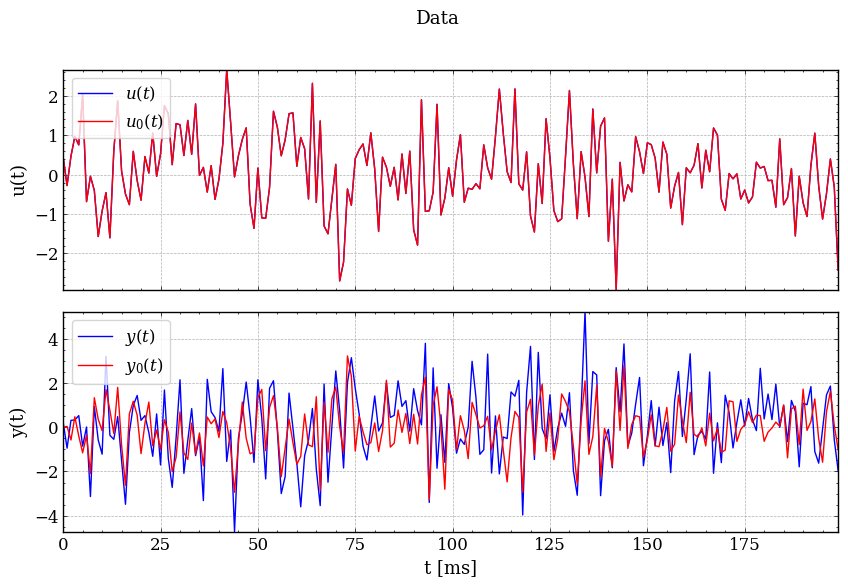

[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done  13 tasks      | elapsed:    8.5s
[Parallel(n_jobs=50)]: Done  28 tasks      | elapsed:    8.6s
[Parallel(n_jobs=50)]: Done  45 tasks      | elapsed:    8.8s
[Parallel(n_jobs=50)]: Done  62 tasks      | elapsed:   13.5s
[Parallel(n_jobs=50)]: Done  81 tasks      | elapsed:   13.7s
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:   14.2s
[Parallel(n_jobs=50)]: Done 121 tasks      | elapsed:   18.6s
[Parallel(n_jobs=50)]: Done 142 tasks      | elapsed:   18.8s
[Parallel(n_jobs=50)]: Done 165 tasks      | elapsed:   23.4s
[Parallel(n_jobs=50)]: Done 188 tasks      | elapsed:   23.7s
[Parallel(n_jobs=50)]: Done 213 tasks      | elapsed:   28.3s
[Parallel(n_jobs=50)]: Done 238 tasks      | elapsed:   28.7s
[Parallel(n_jobs=50)]: Done 265 tasks      | elapsed:   33.3s
[Parallel(n_jobs=50)]: Done 292 tasks      | elapsed:   33.8s
[Parallel(n_jobs=50)]: Done 321 tasks      | elapsed:  

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

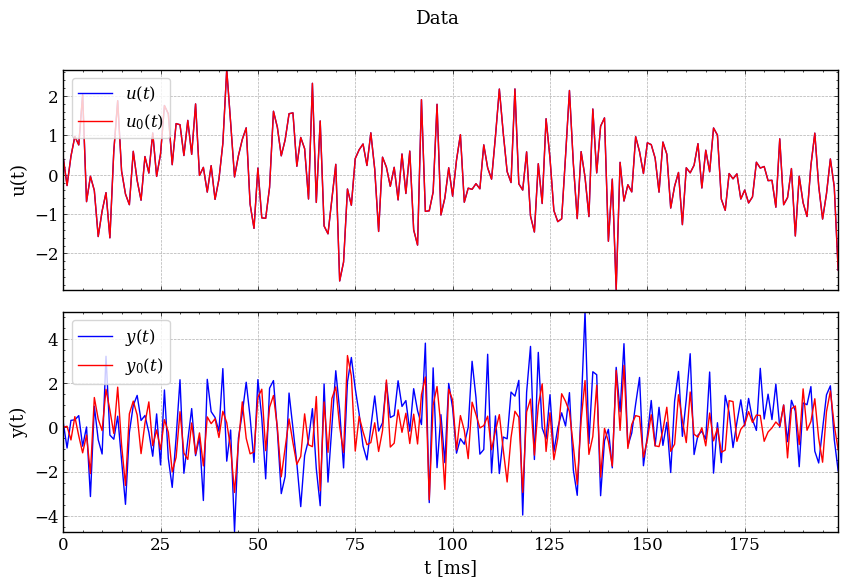

[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done  13 tasks      | elapsed:    4.9s
[Parallel(n_jobs=50)]: Done  28 tasks      | elapsed:    4.9s
[Parallel(n_jobs=50)]: Done  45 tasks      | elapsed:    5.0s
[Parallel(n_jobs=50)]: Done  62 tasks      | elapsed:    9.7s
[Parallel(n_jobs=50)]: Done  81 tasks      | elapsed:    9.9s
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:   10.0s
[Parallel(n_jobs=50)]: Done 121 tasks      | elapsed:   14.7s
[Parallel(n_jobs=50)]: Done 142 tasks      | elapsed:   14.9s
[Parallel(n_jobs=50)]: Done 165 tasks      | elapsed:   19.5s
[Parallel(n_jobs=50)]: Done 188 tasks      | elapsed:   19.8s
[Parallel(n_jobs=50)]: Done 213 tasks      | elapsed:   24.3s
[Parallel(n_jobs=50)]: Done 238 tasks      | elapsed:   24.7s
[Parallel(n_jobs=50)]: Done 265 tasks      | elapsed:   29.2s
[Parallel(n_jobs=50)]: Done 292 tasks      | elapsed:   29.8s
[Parallel(n_jobs=50)]: Done 321 tasks      | elapsed:  

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

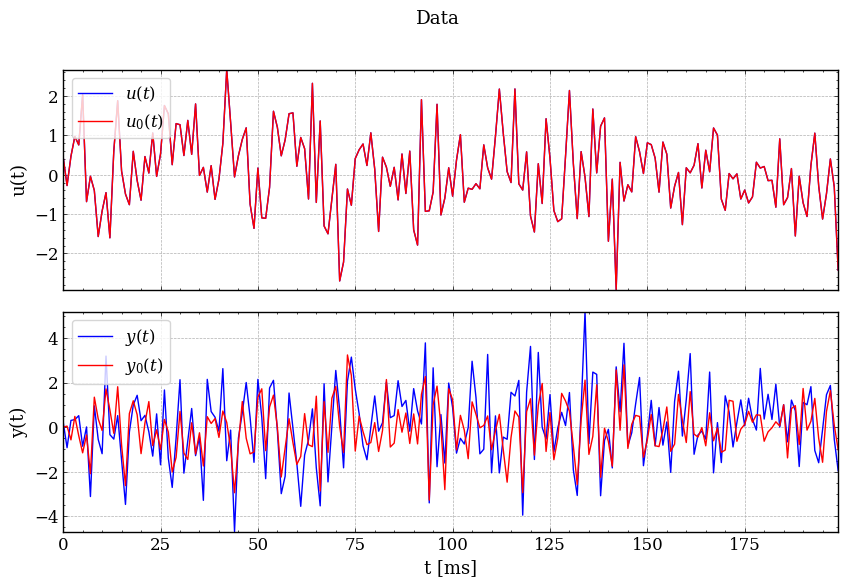

[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done  13 tasks      | elapsed:    4.9s
[Parallel(n_jobs=50)]: Done  28 tasks      | elapsed:    4.9s
[Parallel(n_jobs=50)]: Done  45 tasks      | elapsed:    5.0s
[Parallel(n_jobs=50)]: Done  62 tasks      | elapsed:    9.7s
[Parallel(n_jobs=50)]: Done  81 tasks      | elapsed:    9.9s
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:   10.1s
[Parallel(n_jobs=50)]: Done 121 tasks      | elapsed:   14.7s
[Parallel(n_jobs=50)]: Done 142 tasks      | elapsed:   14.9s
[Parallel(n_jobs=50)]: Done 165 tasks      | elapsed:   19.5s
[Parallel(n_jobs=50)]: Done 188 tasks      | elapsed:   19.9s
[Parallel(n_jobs=50)]: Done 213 tasks      | elapsed:   24.3s
[Parallel(n_jobs=50)]: Done 238 tasks      | elapsed:   24.9s
[Parallel(n_jobs=50)]: Done 265 tasks      | elapsed:   29.3s
[Parallel(n_jobs=50)]: Done 292 tasks      | elapsed:   29.9s
[Parallel(n_jobs=50)]: Done 321 tasks      | elapsed:  

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

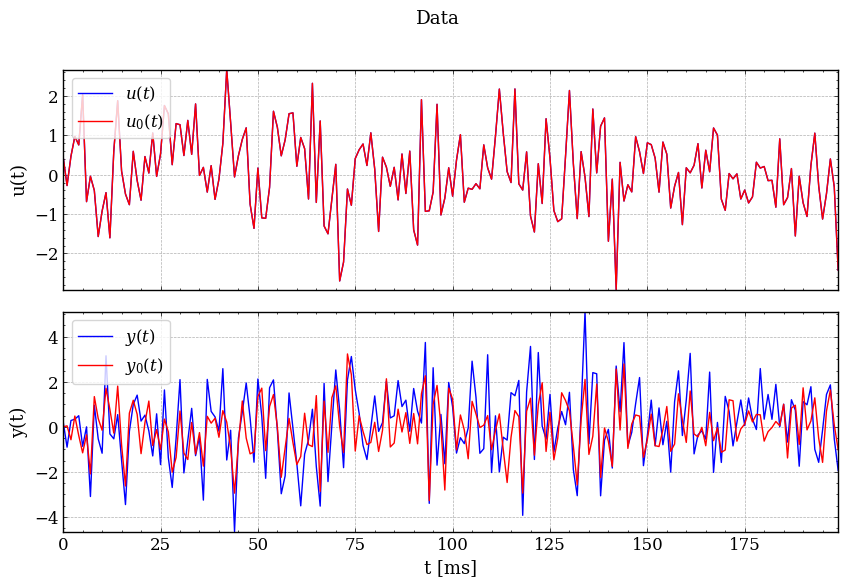

[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done  13 tasks      | elapsed:    4.9s
[Parallel(n_jobs=50)]: Done  28 tasks      | elapsed:    4.9s
[Parallel(n_jobs=50)]: Done  45 tasks      | elapsed:    5.0s
[Parallel(n_jobs=50)]: Done  62 tasks      | elapsed:    9.7s
[Parallel(n_jobs=50)]: Done  81 tasks      | elapsed:    9.8s
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:   10.1s
[Parallel(n_jobs=50)]: Done 121 tasks      | elapsed:   14.7s
[Parallel(n_jobs=50)]: Done 142 tasks      | elapsed:   15.0s
[Parallel(n_jobs=50)]: Done 165 tasks      | elapsed:   19.5s
[Parallel(n_jobs=50)]: Done 188 tasks      | elapsed:   19.9s
[Parallel(n_jobs=50)]: Done 213 tasks      | elapsed:   24.3s
[Parallel(n_jobs=50)]: Done 238 tasks      | elapsed:   24.9s
[Parallel(n_jobs=50)]: Done 265 tasks      | elapsed:   29.2s
[Parallel(n_jobs=50)]: Done 292 tasks      | elapsed:   29.9s
[Parallel(n_jobs=50)]: Done 321 tasks      | elapsed:  

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

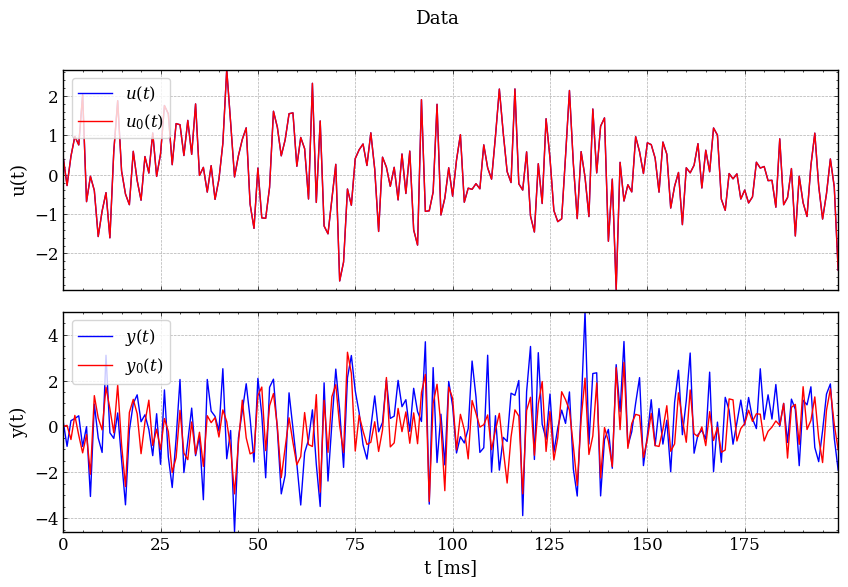

[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done  13 tasks      | elapsed:    4.9s
[Parallel(n_jobs=50)]: Done  28 tasks      | elapsed:    5.0s
[Parallel(n_jobs=50)]: Done  45 tasks      | elapsed:    5.0s
[Parallel(n_jobs=50)]: Done  62 tasks      | elapsed:    9.8s
[Parallel(n_jobs=50)]: Done  81 tasks      | elapsed:    9.9s
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:   10.1s
[Parallel(n_jobs=50)]: Done 121 tasks      | elapsed:   14.7s
[Parallel(n_jobs=50)]: Done 142 tasks      | elapsed:   15.0s
[Parallel(n_jobs=50)]: Done 165 tasks      | elapsed:   19.5s
[Parallel(n_jobs=50)]: Done 188 tasks      | elapsed:   19.9s
[Parallel(n_jobs=50)]: Done 213 tasks      | elapsed:   24.3s
[Parallel(n_jobs=50)]: Done 238 tasks      | elapsed:   24.9s
[Parallel(n_jobs=50)]: Done 265 tasks      | elapsed:   29.2s
[Parallel(n_jobs=50)]: Done 292 tasks      | elapsed:   29.9s
[Parallel(n_jobs=50)]: Done 321 tasks      | elapsed:  

In [ ]:
if not sys.warnoptions:
    warnings.simplefilter('ignore')
    os.environ["PYTHONWARNINGS"] = 'ignore'
    
for snr_db in snr_db_grid:

    ## Data generation
    dt = 0.001
    T = N*dt
    t_horizon = np.arange(0, T, dt)

    a0 = np.array([-0.2, -0.3])
    b0 = np.array([0.1, -1.2])

    rng = np.random.default_rng(seed=SEED)
    u0 = rng.standard_normal(size=(N,M))
    u = u0
    y0 = np.zeros((N,M))

    snr = 10**(snr_db/10)

    for i in tqdm(range(M), total=M):
        _, y0[:,i], _ = simulate_arx(u_sequence=u[:,i], a_params=a0, b_params=b0, sigma2_y=0.0)

    sigma2_y = np.mean(np.var(y0, axis=0)/snr)
    
    ## Training data generation
    y0 = np.zeros((N,M))
    y = np.zeros((N,M))
    e_y = np.zeros((N,M))

    for i in tqdm(range(M), total=M):
        y[:,i], y0[:,i], e_y[:,i] = simulate_arx(u_sequence=u[:,i], a_params=a0, b_params=b0, sigma2_y=sigma2_y, seed=SEED*(i+1))

    ## Test data generation
    rng = np.random.default_rng(seed=SEED_TEST)
    u_test = rng.standard_normal(size=N_test)
    y_test = np.zeros(N_test)
    y_test, _, _ = simulate_arx(u_sequence=u_test, a_params=a0, b_params=b0, sigma2_y=0.0)
    
    ## Visualize a random realization of train data
    fig_params.update({'figure.figsize': [10, 6]})
    rcParams.update(fig_params)
    plot_random_realization(u0, y0, u, y, t_horizon, SEED)
    
    for model_name, model in models.items():
        results_df.loc[(model_name, snr_db), columns[:-2]] = Parallel(n_jobs=50, verbose=10)(delayed(arx_identification_iv)(model, u[:,i], y[:,i], na, nb) for i in range(M))
        results_df.loc[(model_name, snr_db), columns[-2:]] = Parallel(n_jobs=50, verbose=10)(delayed(simulation_error)(u_test, y_test,
                                                                                                            a_estimated=results_df.loc[(model_name,snr_db,i), a_columns],
                                                                                                            b_estimated=results_df.loc[(model_name,snr_db,i), b_columns]) for i in range(M))

In [ ]:
#results_df.to_pickle('../results/Example2.pickle')

In [36]:
results_df = pd.read_pickle('../results/Example2_b.pickle')

In [37]:
indices = pd.MultiIndex.from_product([['MultiRidge_from_Lasso'], snr_db_grid, range(M)], names=['model', 'snr_db', 'experiment'])
a_columns = [f'a{i+1}' for i in range(na)]
b_columns = [f'b{i+1}' for i in range(nb)]
columns = a_columns + b_columns + ['simulation_error', 'r2_score']
results_df_new = pd.DataFrame(data=0.0, index=indices, columns=columns)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

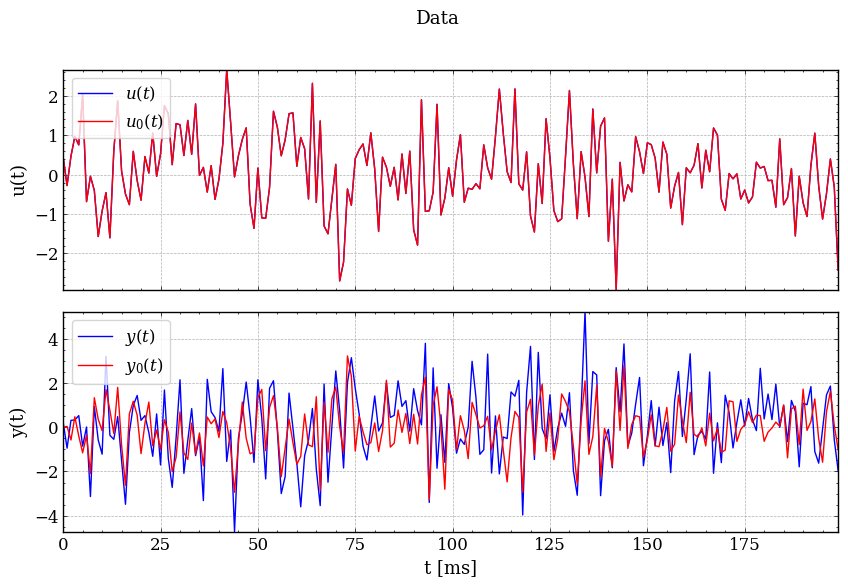

[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done  13 tasks      | elapsed:    7.3s
[Parallel(n_jobs=50)]: Done  28 tasks      | elapsed:    7.7s
[Parallel(n_jobs=50)]: Done  45 tasks      | elapsed:    7.8s
[Parallel(n_jobs=50)]: Done  62 tasks      | elapsed:    9.2s
[Parallel(n_jobs=50)]: Done  81 tasks      | elapsed:    9.7s
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:    9.9s
[Parallel(n_jobs=50)]: Done 121 tasks      | elapsed:   11.2s
[Parallel(n_jobs=50)]: Done 142 tasks      | elapsed:   11.6s
[Parallel(n_jobs=50)]: Done 165 tasks      | elapsed:   12.9s
[Parallel(n_jobs=50)]: Done 188 tasks      | elapsed:   13.4s
[Parallel(n_jobs=50)]: Done 213 tasks      | elapsed:   14.6s
[Parallel(n_jobs=50)]: Done 238 tasks      | elapsed:   15.2s
[Parallel(n_jobs=50)]: Done 265 tasks      | elapsed:   16.4s
[Parallel(n_jobs=50)]: Done 292 tasks      | elapsed:   17.0s
[Parallel(n_jobs=50)]: Done 321 tasks      | elapsed:  

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

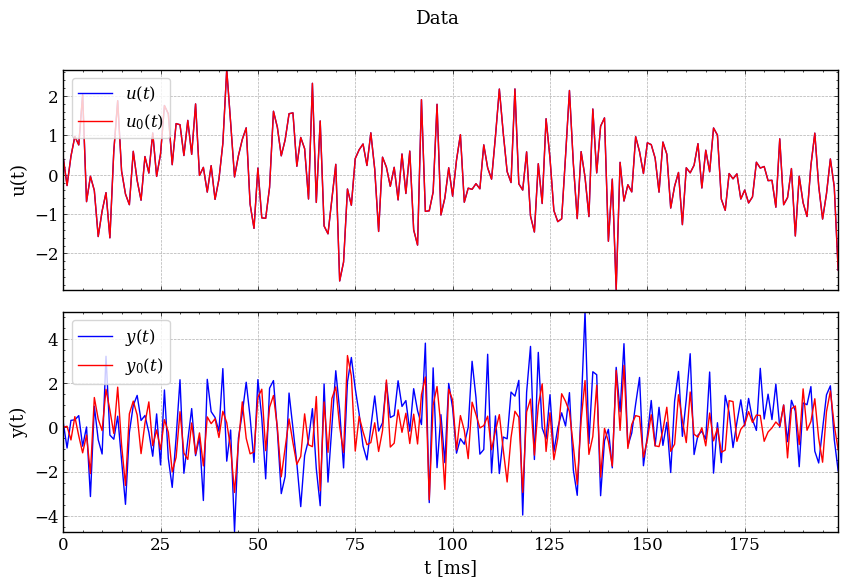

[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done  13 tasks      | elapsed:    2.0s
[Parallel(n_jobs=50)]: Done  28 tasks      | elapsed:    2.0s
[Parallel(n_jobs=50)]: Done  45 tasks      | elapsed:    2.0s
[Parallel(n_jobs=50)]: Done  62 tasks      | elapsed:    3.8s
[Parallel(n_jobs=50)]: Done  81 tasks      | elapsed:    3.8s
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:    3.9s
[Parallel(n_jobs=50)]: Done 121 tasks      | elapsed:    5.6s
[Parallel(n_jobs=50)]: Done 142 tasks      | elapsed:    5.7s
[Parallel(n_jobs=50)]: Done 165 tasks      | elapsed:    7.3s
[Parallel(n_jobs=50)]: Done 188 tasks      | elapsed:    7.5s
[Parallel(n_jobs=50)]: Done 213 tasks      | elapsed:    9.1s
[Parallel(n_jobs=50)]: Done 238 tasks      | elapsed:    9.3s
[Parallel(n_jobs=50)]: Done 265 tasks      | elapsed:   10.9s
[Parallel(n_jobs=50)]: Done 292 tasks      | elapsed:   11.1s
[Parallel(n_jobs=50)]: Done 321 tasks      | elapsed:  

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

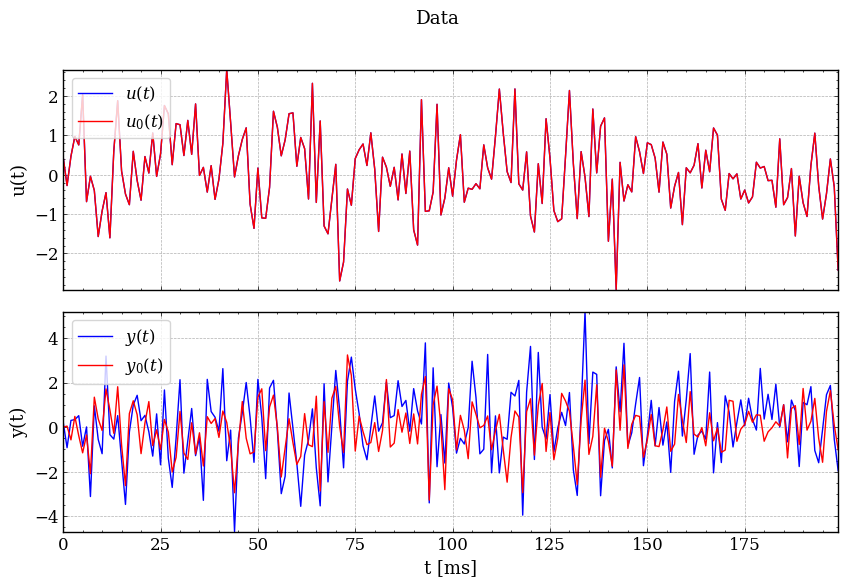

[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done  13 tasks      | elapsed:    2.1s
[Parallel(n_jobs=50)]: Done  28 tasks      | elapsed:    2.1s
[Parallel(n_jobs=50)]: Done  45 tasks      | elapsed:    2.1s
[Parallel(n_jobs=50)]: Done  62 tasks      | elapsed:    3.8s
[Parallel(n_jobs=50)]: Done  81 tasks      | elapsed:    3.9s
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:    4.0s
[Parallel(n_jobs=50)]: Done 121 tasks      | elapsed:    5.6s
[Parallel(n_jobs=50)]: Done 142 tasks      | elapsed:    5.7s
[Parallel(n_jobs=50)]: Done 165 tasks      | elapsed:    7.4s
[Parallel(n_jobs=50)]: Done 188 tasks      | elapsed:    7.5s
[Parallel(n_jobs=50)]: Done 213 tasks      | elapsed:    9.2s
[Parallel(n_jobs=50)]: Done 238 tasks      | elapsed:    9.3s
[Parallel(n_jobs=50)]: Done 265 tasks      | elapsed:   11.0s
[Parallel(n_jobs=50)]: Done 292 tasks      | elapsed:   11.1s
[Parallel(n_jobs=50)]: Done 321 tasks      | elapsed:  

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

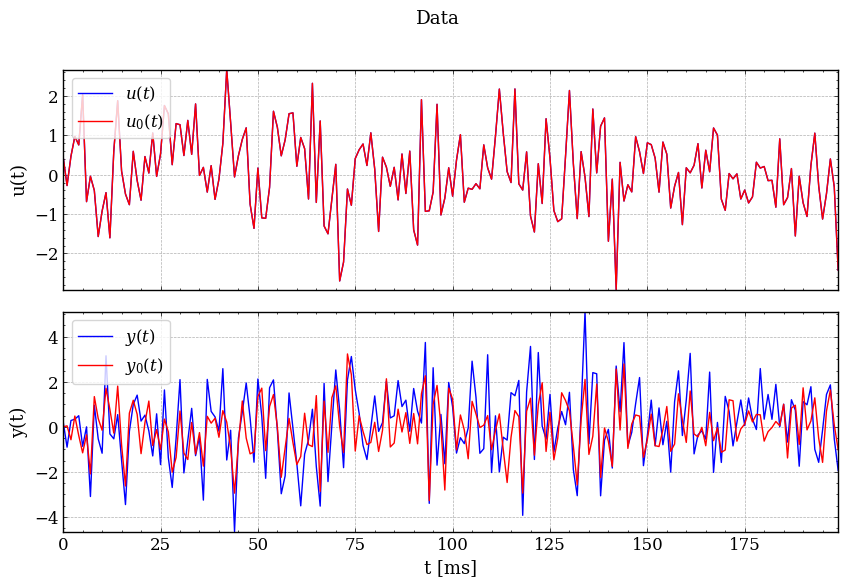

[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done  13 tasks      | elapsed:    2.1s
[Parallel(n_jobs=50)]: Done  28 tasks      | elapsed:    2.1s
[Parallel(n_jobs=50)]: Done  45 tasks      | elapsed:    2.1s
[Parallel(n_jobs=50)]: Done  62 tasks      | elapsed:    3.9s
[Parallel(n_jobs=50)]: Done  81 tasks      | elapsed:    3.9s
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:    4.0s
[Parallel(n_jobs=50)]: Done 121 tasks      | elapsed:    5.7s
[Parallel(n_jobs=50)]: Done 142 tasks      | elapsed:    5.8s
[Parallel(n_jobs=50)]: Done 165 tasks      | elapsed:    7.4s
[Parallel(n_jobs=50)]: Done 188 tasks      | elapsed:    7.5s
[Parallel(n_jobs=50)]: Done 213 tasks      | elapsed:    9.2s
[Parallel(n_jobs=50)]: Done 238 tasks      | elapsed:    9.3s
[Parallel(n_jobs=50)]: Done 265 tasks      | elapsed:   11.0s
[Parallel(n_jobs=50)]: Done 292 tasks      | elapsed:   11.2s
[Parallel(n_jobs=50)]: Done 321 tasks      | elapsed:  

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

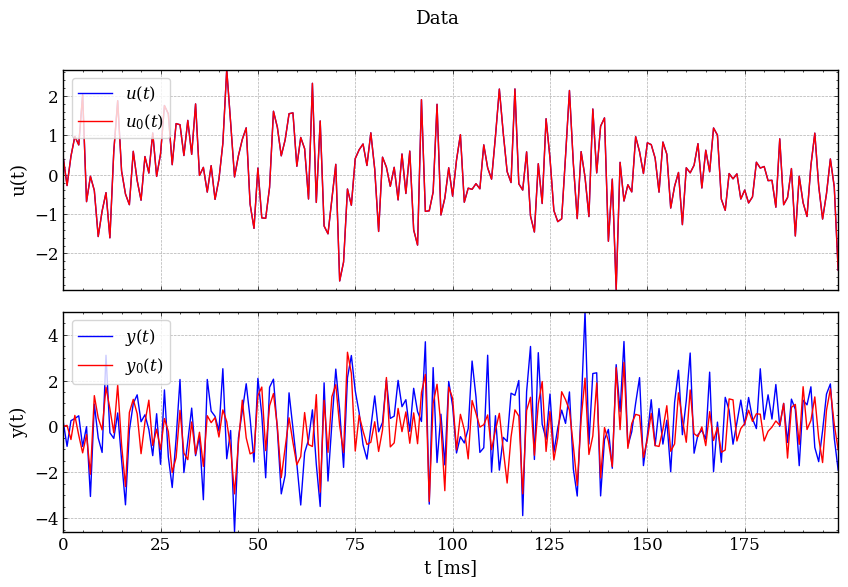

[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done  13 tasks      | elapsed:    2.1s
[Parallel(n_jobs=50)]: Done  28 tasks      | elapsed:    2.1s
[Parallel(n_jobs=50)]: Done  45 tasks      | elapsed:    2.1s
[Parallel(n_jobs=50)]: Done  62 tasks      | elapsed:    3.9s
[Parallel(n_jobs=50)]: Done  81 tasks      | elapsed:    3.9s
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:    4.1s
[Parallel(n_jobs=50)]: Done 121 tasks      | elapsed:    5.7s
[Parallel(n_jobs=50)]: Done 142 tasks      | elapsed:    5.8s
[Parallel(n_jobs=50)]: Done 165 tasks      | elapsed:    7.4s
[Parallel(n_jobs=50)]: Done 188 tasks      | elapsed:    7.6s
[Parallel(n_jobs=50)]: Done 213 tasks      | elapsed:    9.2s
[Parallel(n_jobs=50)]: Done 238 tasks      | elapsed:    9.4s
[Parallel(n_jobs=50)]: Done 265 tasks      | elapsed:   11.0s
[Parallel(n_jobs=50)]: Done 292 tasks      | elapsed:   11.2s
[Parallel(n_jobs=50)]: Done 321 tasks      | elapsed:  

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

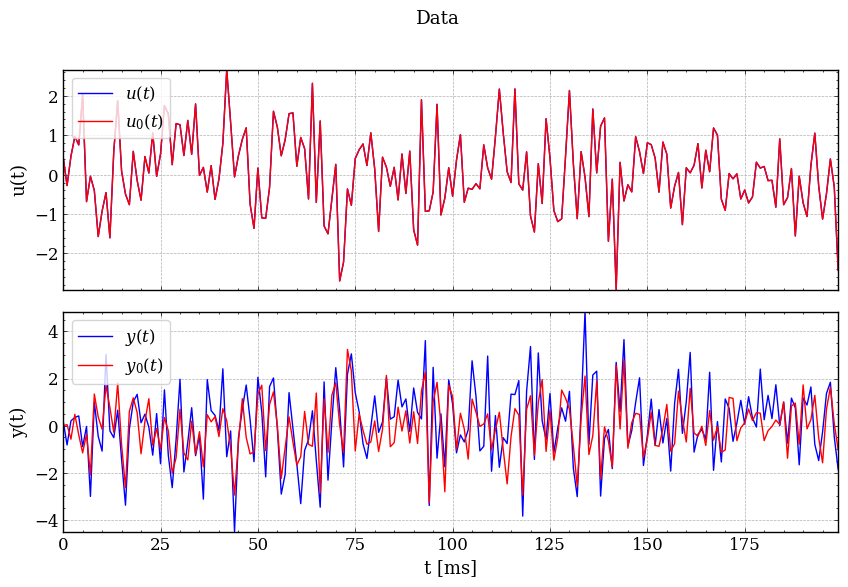

[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done  13 tasks      | elapsed:    2.1s
[Parallel(n_jobs=50)]: Done  28 tasks      | elapsed:    2.1s
[Parallel(n_jobs=50)]: Done  45 tasks      | elapsed:    2.1s
[Parallel(n_jobs=50)]: Done  62 tasks      | elapsed:    3.8s
[Parallel(n_jobs=50)]: Done  81 tasks      | elapsed:    3.9s
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:    4.0s
[Parallel(n_jobs=50)]: Done 121 tasks      | elapsed:    5.7s
[Parallel(n_jobs=50)]: Done 142 tasks      | elapsed:    5.7s
[Parallel(n_jobs=50)]: Done 165 tasks      | elapsed:    7.4s
[Parallel(n_jobs=50)]: Done 188 tasks      | elapsed:    7.5s
[Parallel(n_jobs=50)]: Done 213 tasks      | elapsed:    9.1s
[Parallel(n_jobs=50)]: Done 238 tasks      | elapsed:    9.3s
[Parallel(n_jobs=50)]: Done 265 tasks      | elapsed:   10.9s
[Parallel(n_jobs=50)]: Done 292 tasks      | elapsed:   11.2s
[Parallel(n_jobs=50)]: Done 321 tasks      | elapsed:  

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

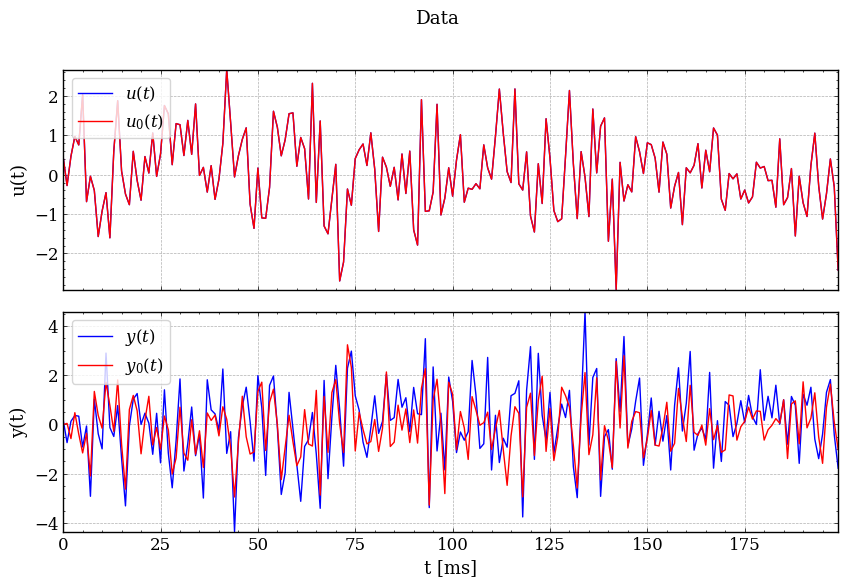

[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done  13 tasks      | elapsed:    2.1s
[Parallel(n_jobs=50)]: Done  28 tasks      | elapsed:    2.1s
[Parallel(n_jobs=50)]: Done  45 tasks      | elapsed:    2.1s
[Parallel(n_jobs=50)]: Done  62 tasks      | elapsed:    3.8s
[Parallel(n_jobs=50)]: Done  81 tasks      | elapsed:    3.9s
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:    4.1s
[Parallel(n_jobs=50)]: Done 121 tasks      | elapsed:    5.7s
[Parallel(n_jobs=50)]: Done 142 tasks      | elapsed:    5.8s
[Parallel(n_jobs=50)]: Done 165 tasks      | elapsed:    7.4s
[Parallel(n_jobs=50)]: Done 188 tasks      | elapsed:    7.6s
[Parallel(n_jobs=50)]: Done 213 tasks      | elapsed:    9.2s
[Parallel(n_jobs=50)]: Done 238 tasks      | elapsed:    9.4s
[Parallel(n_jobs=50)]: Done 265 tasks      | elapsed:   11.0s
[Parallel(n_jobs=50)]: Done 292 tasks      | elapsed:   11.2s
[Parallel(n_jobs=50)]: Done 321 tasks      | elapsed:  

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

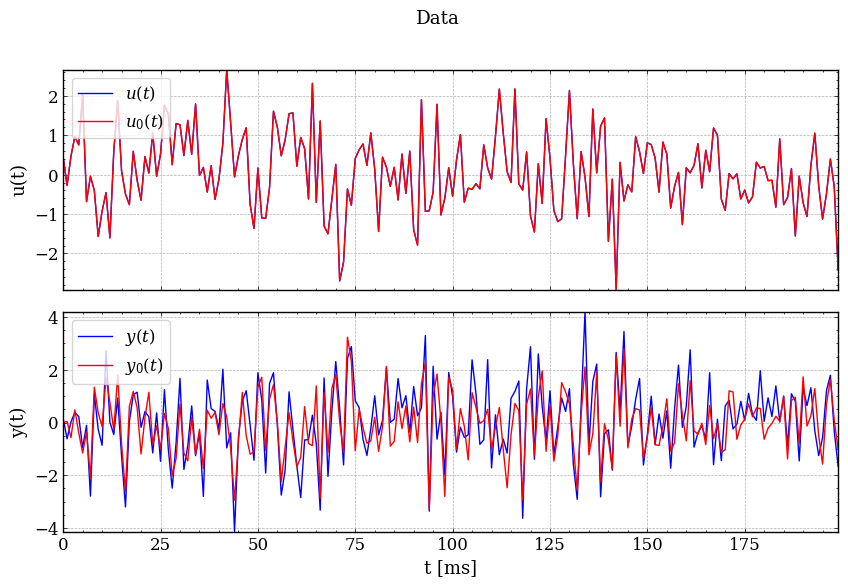

[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done  13 tasks      | elapsed:    2.1s
[Parallel(n_jobs=50)]: Done  28 tasks      | elapsed:    2.1s
[Parallel(n_jobs=50)]: Done  45 tasks      | elapsed:    2.1s
[Parallel(n_jobs=50)]: Done  62 tasks      | elapsed:    3.8s
[Parallel(n_jobs=50)]: Done  81 tasks      | elapsed:    3.9s
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:    4.0s
[Parallel(n_jobs=50)]: Done 121 tasks      | elapsed:    5.7s
[Parallel(n_jobs=50)]: Done 142 tasks      | elapsed:    5.8s
[Parallel(n_jobs=50)]: Done 165 tasks      | elapsed:    7.5s
[Parallel(n_jobs=50)]: Done 188 tasks      | elapsed:    7.6s
[Parallel(n_jobs=50)]: Done 213 tasks      | elapsed:    9.2s
[Parallel(n_jobs=50)]: Done 238 tasks      | elapsed:    9.4s
[Parallel(n_jobs=50)]: Done 265 tasks      | elapsed:   11.0s
[Parallel(n_jobs=50)]: Done 292 tasks      | elapsed:   11.2s
[Parallel(n_jobs=50)]: Done 321 tasks      | elapsed:  

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

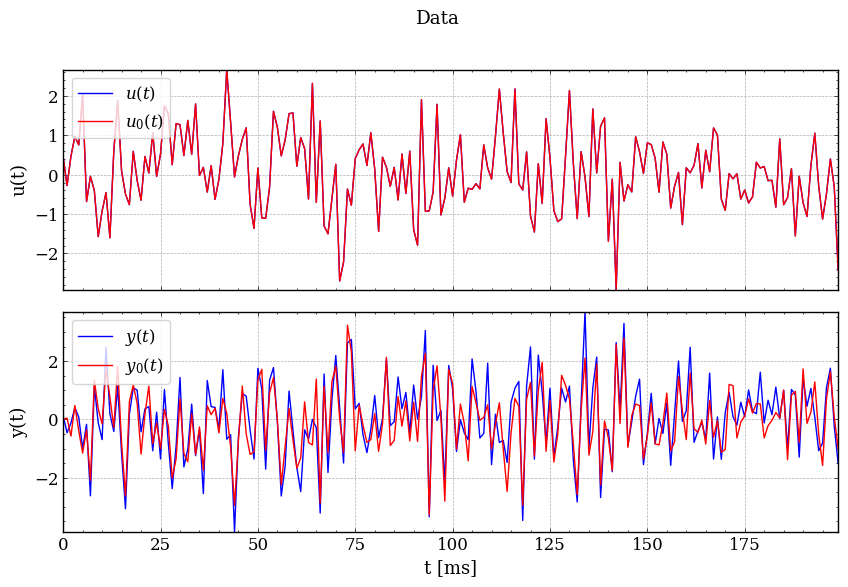

[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done  13 tasks      | elapsed:    2.1s
[Parallel(n_jobs=50)]: Done  28 tasks      | elapsed:    2.1s
[Parallel(n_jobs=50)]: Done  45 tasks      | elapsed:    2.1s
[Parallel(n_jobs=50)]: Done  62 tasks      | elapsed:    3.8s
[Parallel(n_jobs=50)]: Done  81 tasks      | elapsed:    4.0s
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:    4.1s
[Parallel(n_jobs=50)]: Done 121 tasks      | elapsed:    5.7s
[Parallel(n_jobs=50)]: Done 142 tasks      | elapsed:    5.8s
[Parallel(n_jobs=50)]: Done 165 tasks      | elapsed:    7.5s
[Parallel(n_jobs=50)]: Done 188 tasks      | elapsed:    7.6s
[Parallel(n_jobs=50)]: Done 213 tasks      | elapsed:    9.3s
[Parallel(n_jobs=50)]: Done 238 tasks      | elapsed:    9.5s
[Parallel(n_jobs=50)]: Done 265 tasks      | elapsed:   11.1s
[Parallel(n_jobs=50)]: Done 292 tasks      | elapsed:   11.3s
[Parallel(n_jobs=50)]: Done 321 tasks      | elapsed:  

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

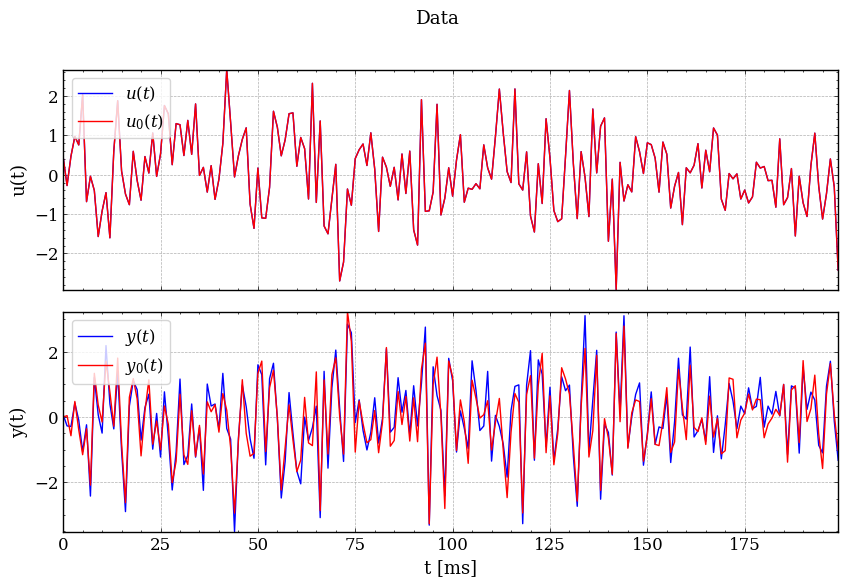

[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done  13 tasks      | elapsed:    2.1s
[Parallel(n_jobs=50)]: Done  28 tasks      | elapsed:    2.1s
[Parallel(n_jobs=50)]: Done  45 tasks      | elapsed:    2.1s
[Parallel(n_jobs=50)]: Done  62 tasks      | elapsed:    3.8s
[Parallel(n_jobs=50)]: Done  81 tasks      | elapsed:    3.9s
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:    4.0s
[Parallel(n_jobs=50)]: Done 121 tasks      | elapsed:    5.7s
[Parallel(n_jobs=50)]: Done 142 tasks      | elapsed:    5.8s
[Parallel(n_jobs=50)]: Done 165 tasks      | elapsed:    7.5s
[Parallel(n_jobs=50)]: Done 188 tasks      | elapsed:    7.6s
[Parallel(n_jobs=50)]: Done 213 tasks      | elapsed:    9.2s
[Parallel(n_jobs=50)]: Done 238 tasks      | elapsed:    9.4s
[Parallel(n_jobs=50)]: Done 265 tasks      | elapsed:   11.1s
[Parallel(n_jobs=50)]: Done 292 tasks      | elapsed:   11.3s
[Parallel(n_jobs=50)]: Done 321 tasks      | elapsed:  

In [55]:
if not sys.warnoptions:
    warnings.simplefilter('ignore')
    os.environ["PYTHONWARNINGS"] = 'ignore'
    
for snr_db in snr_db_grid:

    ## Data generation
    dt = 0.001
    T = N*dt
    t_horizon = np.arange(0, T, dt)

    a0 = np.array([-0.2, -0.3])
    b0 = np.array([0.1, -1.2])

    rng = np.random.default_rng(seed=SEED)
    u0 = rng.standard_normal(size=(N,M))
    u = u0
    y0 = np.zeros((N,M))

    snr = 10**(snr_db/10)

    for i in tqdm(range(M), total=M):
        _, y0[:,i], _ = simulate_arx(u_sequence=u[:,i], a_params=a0, b_params=b0, sigma2_y=0.0)

    sigma2_y = np.mean(np.var(y0, axis=0)/snr)
    
    ## Training data generation
    y0 = np.zeros((N,M))
    y = np.zeros((N,M))
    e_y = np.zeros((N,M))

    for i in tqdm(range(M), total=M):
        y[:,i], y0[:,i], e_y[:,i] = simulate_arx(u_sequence=u[:,i], a_params=a0, b_params=b0, sigma2_y=sigma2_y, seed=SEED*(i+1))

    ## Test data generation
    rng = np.random.default_rng(seed=SEED_TEST)
    u_test = rng.standard_normal(size=N_test)
    y_test = np.zeros(N_test)
    y_test, _, _ = simulate_arx(u_sequence=u_test, a_params=a0, b_params=b0, sigma2_y=0.0)
    
    ## Visualize a random realization of train data
    fig_params.update({'figure.figsize': [10, 6]})
    rcParams.update(fig_params)
    plot_random_realization(u0, y0, u, y, t_horizon, SEED)

    model_name = 'MultiRidge_from_Lasso'
    results_df_new.loc[(model_name, snr_db), columns[:-2]] = Parallel(n_jobs=50, verbose=10)(delayed(arx_identification_iv)(MultiRidge(alpha=(results_df.loc[('Lasso',snr_db,i), a_columns+b_columns].abs().values < 0.1)*1,
                                                                                                                             folds=5, shuffle=False, epochs=1000, learning_rate=LinearLR(initial_lr=1.0, decay=0.999)),
                                                                                                                  u[:,i], y[:,i], na, nb) for i in range(M))
    results_df_new.loc[(model_name, snr_db), columns[-2:]] = Parallel(n_jobs=50, verbose=10)(delayed(simulation_error)(u_test, y_test,
                                                                                                        a_estimated=results_df_new.loc[(model_name,snr_db,i), a_columns],
                                                                                                        b_estimated=results_df_new.loc[(model_name,snr_db,i), b_columns]) for i in range(M))

In [56]:
results_df = pd.read_pickle('../results/Example2_b.pickle')
results_df = pd.concat([results_df, results_df_new], ignore_index=False)

## Results visualization

In [4]:
models = ['Ridge',
          'Lasso',
          'ElasticNet',
          'MultiRidge',
          #'MultiRidge_from_Lasso'
         ]

In [5]:
results_df = pd.read_pickle('../results/Example2_b.pickle')

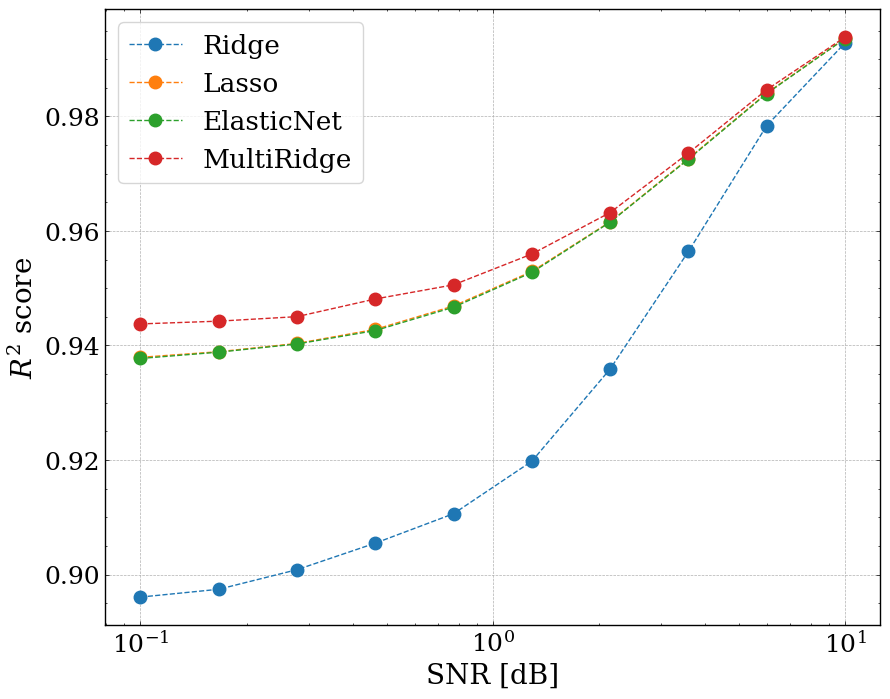

In [6]:
fig_params['axes.labelsize'] = 20
fig_params['xtick.labelsize'] = 18
fig_params['ytick.labelsize'] = 18
fig_params['legend.fontsize'] = 19
fig_params['axes.grid'] = True
rcParams.update(fig_params)

metric = 'r2_score'
fig = plt.figure(figsize=(10,8))

for model in models:
    tmp = results_df.loc[model].reset_index().groupby('snr_db')[[metric]]
    plt.errorbar(tmp.median().index.tolist(), tmp.median().values.tolist(), marker='.', linestyle='--', markersize=18, capsize=5, label=f'{model}')
plt.xscale('log')
plt.ylabel(r'$R^2$ score')
plt.xlabel('SNR [dB]')
#plt.xlim(0,1400)
#plt.ylim(0.6, 1.0)
plt.margins(0.05)
plt.legend();

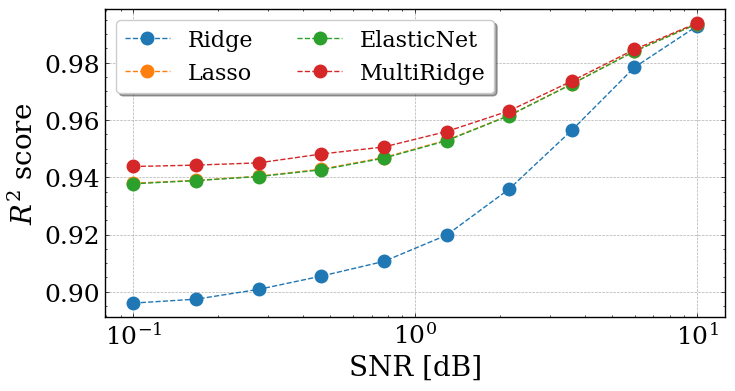

In [14]:
fig_params['axes.labelsize'] = 20
fig_params['xtick.labelsize'] = 18
fig_params['ytick.labelsize'] = 18
fig_params['legend.fontsize'] = 16
fig_params['axes.grid'] = True
rcParams.update(fig_params)

metric = 'r2_score'
fig = plt.figure(figsize=(8,4))

for model in models:
    tmp = results_df.loc[model].reset_index().groupby('snr_db')[[metric]]
    plt.errorbar(tmp.median().index.tolist(), tmp.median().values.tolist(), marker='.', linestyle='--', markersize=18, capsize=5, label=f'{model}')
plt.xscale('log')
plt.ylabel(r'$R^2$ score')
plt.xlabel('SNR [dB]')
#plt.xlim(0,1400)
#plt.ylim(0.6, 1.0)
plt.margins(0.05)
plt.legend(loc="upper left", #bbox_to_anchor=[0, 1],
                 ncols=2, shadow=True, title="", fancybox=True);

In [15]:
FIG_SIZE = (8,4)
SAVE_FIG = True
FIG_FMT = 'pdf'
TRANSPARENT_PNG=True

save_fig(
    fig,
    'instrumental_variable',
    fig_dir=os.path.join('..','figures'),
    fig_fmt=FIG_FMT,
    save=SAVE_FIG, 
    fig_size=FIG_SIZE,
    transparent_png=TRANSPARENT_PNG,
)

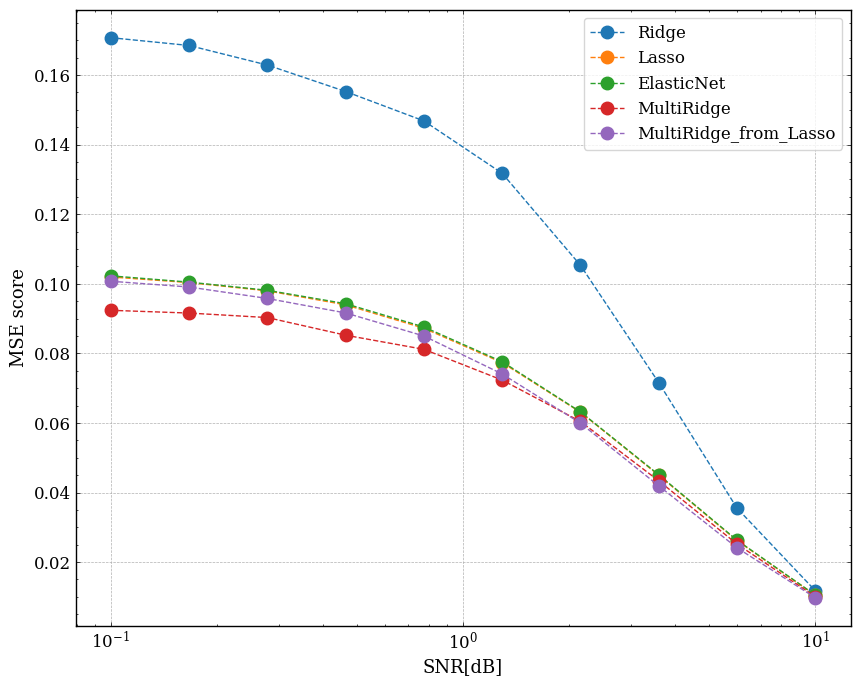

In [60]:
metric = 'simulation_error'
fig = plt.figure(figsize=(10,8))

for model in models:
    tmp = results_df.loc[model].reset_index().groupby('snr_db')[[metric]]
    plt.errorbar(tmp.median().index.tolist(), tmp.median().values.tolist(), marker='.', linestyle='--', markersize=18, capsize=5, label=f'{model}')
plt.xscale('log')
plt.ylabel(r'MSE score')
plt.xlabel('SNR[dB]')
#plt.xlim(0,1400)
#plt.ylim(0.6, 1.0)
plt.margins(0.05)
plt.legend();